## 0. Перепишите этот код через map.


In [11]:
names = ['Маша', 'Ира', 'Илларион']

for i in range(len(names)):
  names[i] = hash(names[i])

print(names)

[-3325613471009075826, 7438922308344210745, -7659854484404466580]


In [12]:
names = ['Маша', 'Ира', 'Илларион']

names = list(map(lambda x: hash(x), names))

print(names)

[-3325613471009075826, 7438922308344210745, -7659854484404466580]


## 1. Напишите "наивную" рекуррентную функцию вычисления n-го числа Фибоначчи.

In [69]:
%%time

def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)
fib(35)

CPU times: user 3.23 s, sys: 9.95 ms, total: 3.24 s
Wall time: 3.26 s


9227465

In [40]:
%%time
import functools

@functools.lru_cache()
def fib(n): 
  if n <= 1:  # одно и то же условие проверяет и граничный, и рекурсивный случаи сразу
    return n
  return fib(n-1) + fib(n-2)

fib(35)

CPU times: user 138 µs, sys: 0 ns, total: 138 µs
Wall time: 146 µs


9227465

## 2. Напишите рекуррентную функцию вычисления списка чисел Фибоначчи (от 0-го до n-го) по данному n

In [60]:
%%time

def fib_list(n):
    if n == 0:
        return [0]
    if n == 1:
        return [0, 1]
    result = fib_list(n - 1)
    return fib_list(n - 1) + [result[-2] + result[-1]]
    
n = 25
fib_list(n)

CPU times: user 7.82 s, sys: 28.9 ms, total: 7.85 s
Wall time: 7.94 s


[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025]

In [62]:
%%time

@functools.lru_cache()
def fib_list(n):
    if n == 0:
        return [0]
    if n == 1:
        return [0, 1]
    result = fib_list(n - 1)
    return fib_list(n - 1) + [result[-2] + result[-1]]

fib_list(25)

CPU times: user 118 µs, sys: 0 ns, total: 118 µs
Wall time: 125 µs


[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025]

## 3. Нарисуйте график роста времени работы этих функций по мере увеличения n.

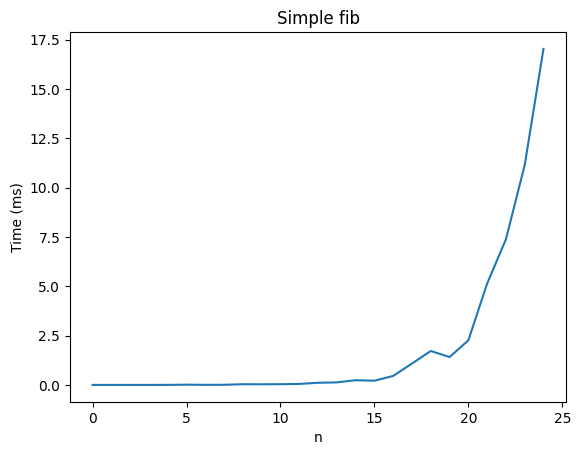

In [79]:
import timeit
import matplotlib.pyplot as plt


def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

def plot_fib_time():
    times = []
    for i in range(0, 25):
        t = timeit.Timer(lambda: fib(i))
        times.append(t.timeit(number=1000))
    plt.plot(times)
    plt.ylabel('Time (ms)')
    plt.xlabel('n')
    plt.title("Simple fib")
    plt.show()

plot_fib_time()

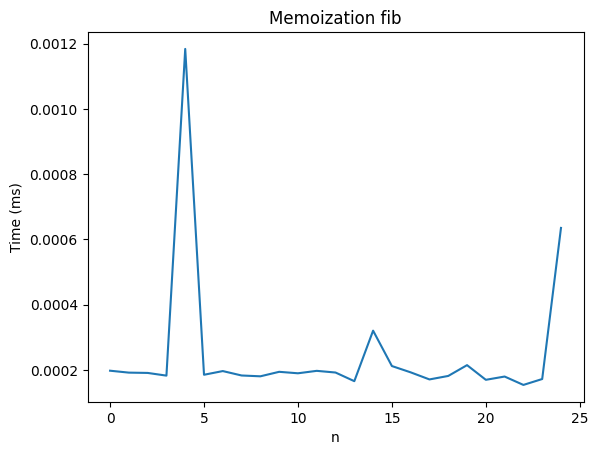

In [78]:
@functools.lru_cache()
def fib(n): 
  if n <= 1:  # одно и то же условие проверяет и граничный, и рекурсивный случаи сразу
    return n
  return fib(n-1) + fib(n-2)

def plot_fib_time():
    times = []
    for i in range(0, 25):
        t = timeit.Timer(lambda: fib(i))
        times.append(t.timeit(number=1000))
    plt.plot(times)
    plt.ylabel('Time (ms)')
    plt.xlabel('n')
    plt.title("Memoization fib")
    plt.show()

plot_fib_time()

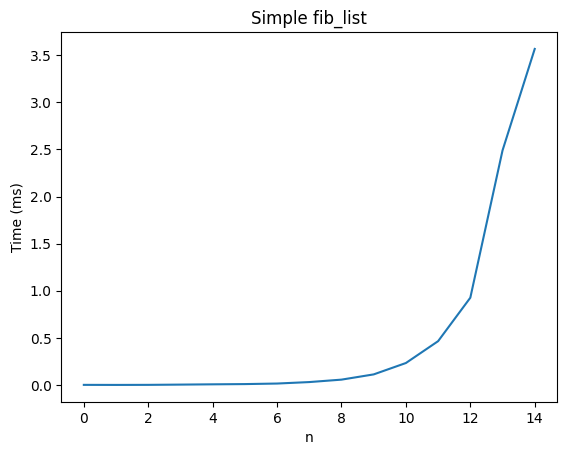

In [77]:
def fib_list(n):
    if n == 0:
        return [0]
    if n == 1:
        return [0, 1]
    result = fib_list(n - 1)
    return fib_list(n - 1) + [result[-2] + result[-1]]

def plot_fib_time():
    times = []
    for i in range(0, 15):
        t = timeit.Timer(lambda: fib_list(i))
        times.append(t.timeit(number=1000))
    plt.plot(times)
    plt.ylabel('Time (ms)')
    plt.xlabel('n')
    plt.title("Simple fib_list")
    plt.show()

plot_fib_time()

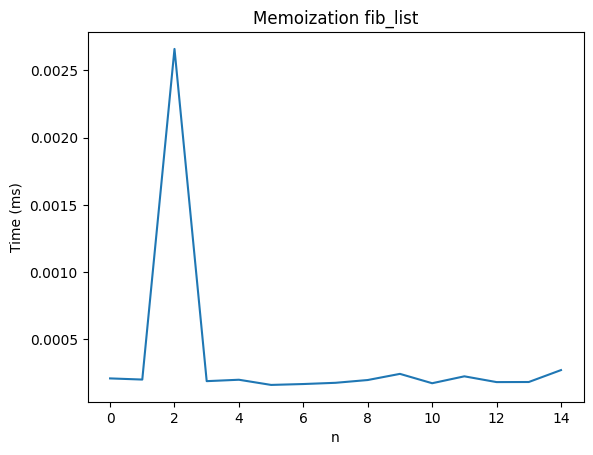

In [75]:
@functools.lru_cache()
def fib_list(n):
    if n == 0:
        return [0]
    if n == 1:
        return [0, 1]
    result = fib_list(n - 1)
    return fib_list(n - 1) + [result[-2] + result[-1]]

def plot_fib_time():
    times = []
    for i in range(0, 15):
        t = timeit.Timer(lambda: fib_list(i))
        times.append(t.timeit(number=1000))
    plt.plot(times)
    plt.ylabel('Time (ms)')
    plt.xlabel('n')
    plt.title("Memoization fib_list")
    plt.show()

plot_fib_time()

## 4.Напишите декоратор: функцию высшего порядка my_timeit(func), результат которой - функция подсчёта времени работы func для разных входных значений, и который можно применить к plot_discrete

In [95]:
import time

def my_timeit(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Время выполнения функции {func.__name__}: {end - start} секунд")
        return result
    return wrapper

@my_timeit
def plot_discrete(n):
  time.sleep(n)
  return 0

plot_discrete(5)

Время выполнения функции plot_discrete: 5.005102634429932 секунд


0

## 5. Перепишите код, используя map:

In [91]:
persons = ['alfred', 'tabitha', 'william', 'arla']
uppered_persons = []
for person in persons:
 persons_ = person.upper()
 uppered_persons.append(persons_)    
print(uppered_persons)

['ALFRED', 'TABITHA', 'WILLIAM', 'ARLA']


In [92]:
persons = ['alfred', 'tabitha', 'william', 'arla']

uppered_persons = list(map(lambda x: x.upper(), persons))

list(uppered_persons)

['ALFRED', 'TABITHA', 'WILLIAM', 'ARLA']

## 6.Выведите все элементы, которые меньше 5, используя filter (filter принимает функцию и коллекцию, возвращает коллекцию элементов, для которых функция возвращает True).

In [89]:
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

result = filter(lambda x: x < 5, a)

list(result)

[1, 1, 2, 3]

## 7.map + filter + reduce:
С помощью анонимной функции извлеките из рандомного списка числа, делимые на 15, и сложите их.

In [135]:
import random
from functools import reduce

random_list = [random.randint(1, 250) for _ in range(20)]

result = reduce(lambda x, y: x + y, list(filter(lambda x: x % 15 == 0, map(lambda x: x * 2, random_list))))

print(random_list)
print(list(filter(lambda x: x % 15 == 0, map(lambda x: x * 2, random_list))))
result

[88, 82, 99, 214, 119, 89, 82, 26, 52, 240, 186, 45, 150, 204, 54, 136, 228, 148, 61, 157]
[480, 90, 300]


870